# 통합 분석: 세 가지 방법론 비교

## 개요
- **분석 대상**: 유튜브 연애 클립 댓글
- **비교 방법론**:
  1. KNU 감정 사전 (렉시콘 기반)
  2. KoELECTRA 감정 분류 (딥러닝 기반)
  3. HateScore 혐오 표현 분석 (딥러닝 기반)

## 데이터 소스
- 통합 댓글 데이터: `output/results/comments_full_analysis.csv`

✓ 라이브러리 로드 완료
✓ font.family      : ['sans-serif']
✓ font.sans-serif  : ['Nanum Gothic', 'NanumGothic', 'AppleGothic']


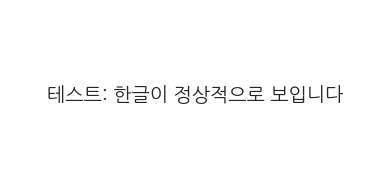

In [1]:
# =========================
# Visualization Environment Setup
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import json
from pathlib import Path

# -------------------------
# Seaborn style (FIRST)
# -------------------------
sns.set_style('whitegrid')
sns.set_palette('husl')

# -------------------------
# Font (Korean-safe, seaborn-compatible)
# -------------------------
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': [
        'Nanum Gothic',
        'NanumGothic',
        'AppleGothic',
        'Malgun Gothic',
        'DejaVu Sans'
    ],
    'axes.unicode_minus': False
})

# -------------------------
# Figure defaults
# -------------------------
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'figure.dpi': 100,
    'savefig.dpi': 300
})

# -------------------------
# Global color scheme
# -------------------------
SENTIMENT_COLORS = {
    'positive': '#4CAF50',  # green
    'negative': '#F44336',  # red
    'neutral':  '#9E9E9E'   # gray
}

print("✓ 라이브러리 로드 완료")
print(f"✓ font.family      : {plt.rcParams['font.family']}")
print(f"✓ font.sans-serif  : {plt.rcParams['font.sans-serif'][:3]}")

# -------------------------
# Font sanity check
# -------------------------
fig, ax = plt.subplots(figsize=(4, 2))
ax.text(
    0.5, 0.5,
    '테스트: 한글이 정상적으로 보입니다',
    ha='center', va='center', fontsize=14
)
ax.axis('off')
plt.tight_layout()
plt.show()

## 1. 통합 데이터 로드

In [2]:
# 통합 댓글 데이터 로드 (샘플링 - 메모리 절약)
print("데이터 로딩 중...")
df = pd.read_csv('../output/results/comments_full_analysis.csv', encoding='utf-8')

print(f"✓ 총 댓글 수: {len(df):,}")
print(f"✓ 총 컬럼 수: {len(df.columns)}")
print()
print("컬럼 목록:")
print(df.columns.tolist())

데이터 로딩 중...
✓ 총 댓글 수: 156,655
✓ 총 컬럼 수: 43

컬럼 목록:
['Video Title', 'Video ID', 'Video Upload Date', 'Video Views', 'Video Likes', 'Video Dislikes', 'Comment Author', 'Comment Date', 'Comment Content', 'Comment Likes', 'program', 'source_file', 'Comment Content Clean', 'Nouns', 'POS_Tags', 'knu_positive_score', 'knu_negative_score', 'knu_neutral_score', 'knu_total_score', 'knu_sentiment', 'knu_matched_words', 'knu_total_morphemes', 'koelectra_emotion', 'koelectra_confidence', 'koelectra_prob_angry', 'koelectra_prob_anxious', 'koelectra_prob_embarrassed', 'koelectra_prob_happy', 'koelectra_prob_heartache', 'koelectra_prob_sad', 'hate_is_hate', 'hate_hate_score', 'hate_hate_categories', 'hate_prob_None', 'hate_prob_기타 혐오', 'hate_prob_남성', 'hate_prob_단순 악플', 'hate_prob_성소수자', 'hate_prob_여성/가족', 'hate_prob_연령', 'hate_prob_인종/국적', 'hate_prob_종교', 'hate_prob_지역']


In [3]:
# 데이터 기본 정보
print("=" * 70)
print("📊 데이터 기본 정보")
print("=" * 70)
print(f"총 댓글 수: {len(df):,}")
print(f"총 동영상 수: {df['Video ID'].nunique()}")
print(f"총 프로그램 수: {df['program'].nunique()}")
print()
print("분석 결과 컬럼:")
print(f"  - KNU 관련: {len([c for c in df.columns if c.startswith('knu_')])}개")
print(f"  - KoELECTRA 관련: {len([c for c in df.columns if c.startswith('koelectra_')])}개")
print(f"  - HateScore 관련: {len([c for c in df.columns if c.startswith('hate_')])}개")

📊 데이터 기본 정보
총 댓글 수: 156,655
총 동영상 수: 342
총 프로그램 수: 36

분석 결과 컬럼:
  - KNU 관련: 7개
  - KoELECTRA 관련: 8개
  - HateScore 관련: 13개


## 2. KNU vs KoELECTRA: 감정 분석 비교

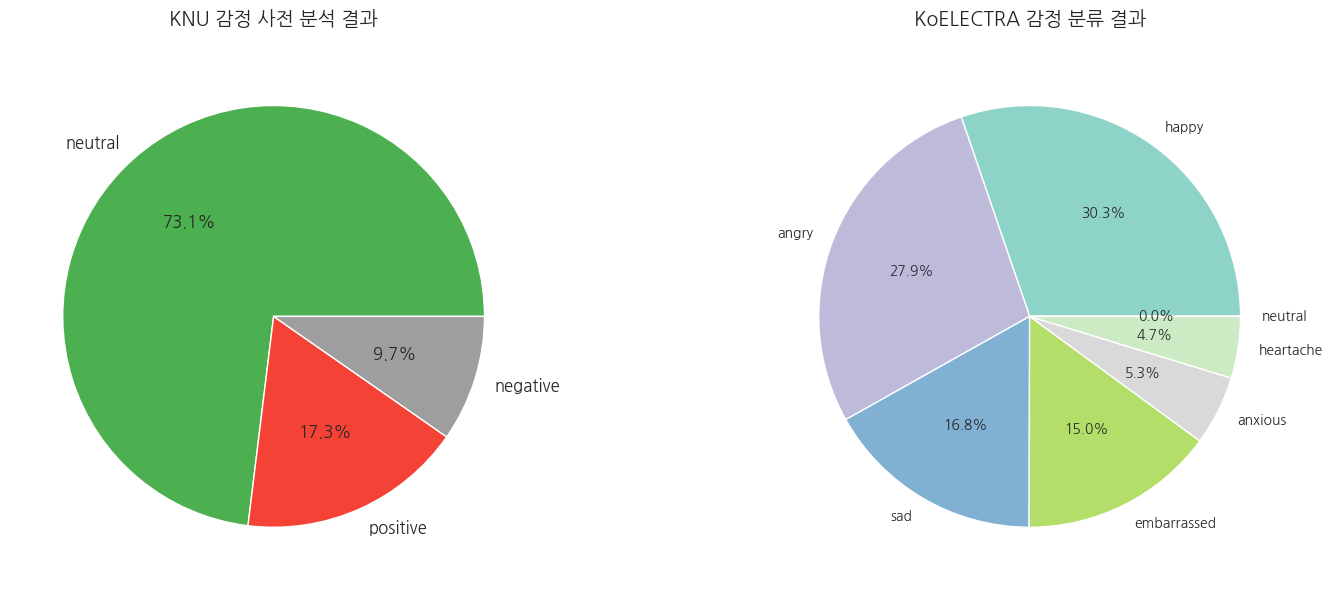

✓ 그래프 저장: output/figures/comparison_knu_vs_koelectra.png


In [4]:
# KNU 감정 분포
knu_sentiment_counts = df['knu_sentiment'].value_counts()

# KoELECTRA 감정 분포
koelectra_emotion_counts = df['koelectra_emotion'].value_counts()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# KNU 파이 차트
axes[0].pie(
    knu_sentiment_counts.values,
    labels=knu_sentiment_counts.index,
    autopct='%1.1f%%',
    colors=['#4CAF50', '#F44336', '#9E9E9E'],
    textprops={'fontsize': 12, 'weight': 'bold'}
)
axes[0].set_title('KNU 감정 사전 분석 결과', fontsize=14, weight='bold', pad=20)

# KoELECTRA 파이 차트
colors_electra = plt.cm.Set3(np.linspace(0, 1, len(koelectra_emotion_counts)))
axes[1].pie(
    koelectra_emotion_counts.values,
    labels=koelectra_emotion_counts.index,
    autopct='%1.1f%%',
    colors=colors_electra,
    textprops={'fontsize': 10, 'weight': 'bold'}
)
axes[1].set_title('KoELECTRA 감정 분류 결과', fontsize=14, weight='bold', pad=20)

plt.tight_layout()
plt.savefig('../output/figures/comparison_knu_vs_koelectra.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 그래프 저장: output/figures/comparison_knu_vs_koelectra.png")

## 3. 긍정/부정 분류 일치도 분석

In [5]:
# KoELECTRA 감정을 긍정/부정/중립으로 매핑
positive_emotions = ['기쁨', '놀람']  # 조정 가능
negative_emotions = ['슬픔', '분노', '공포', '혐오']  # 조정 가능

def map_to_sentiment(emotion):
    if emotion in positive_emotions:
        return 'positive'
    elif emotion in negative_emotions:
        return 'negative'
    else:
        return 'neutral'

df['koelectra_mapped'] = df['koelectra_emotion'].apply(map_to_sentiment)

# 교차표 생성
crosstab = pd.crosstab(df['knu_sentiment'], df['koelectra_mapped'], normalize='all') * 100

print("=" * 70)
print("📊 KNU vs KoELECTRA 감정 분류 일치도 (%)")
print("=" * 70)
print(crosstab)
print()

# 일치율 계산
agreement = ((df['knu_sentiment'] == df['koelectra_mapped']).sum() / len(df)) * 100
print(f"💡 전체 일치율: {agreement:.1f}%")

📊 KNU vs KoELECTRA 감정 분류 일치도 (%)
koelectra_mapped    neutral
knu_sentiment              
negative           9.678593
neutral           73.059270
positive          17.262137

💡 전체 일치율: 73.1%


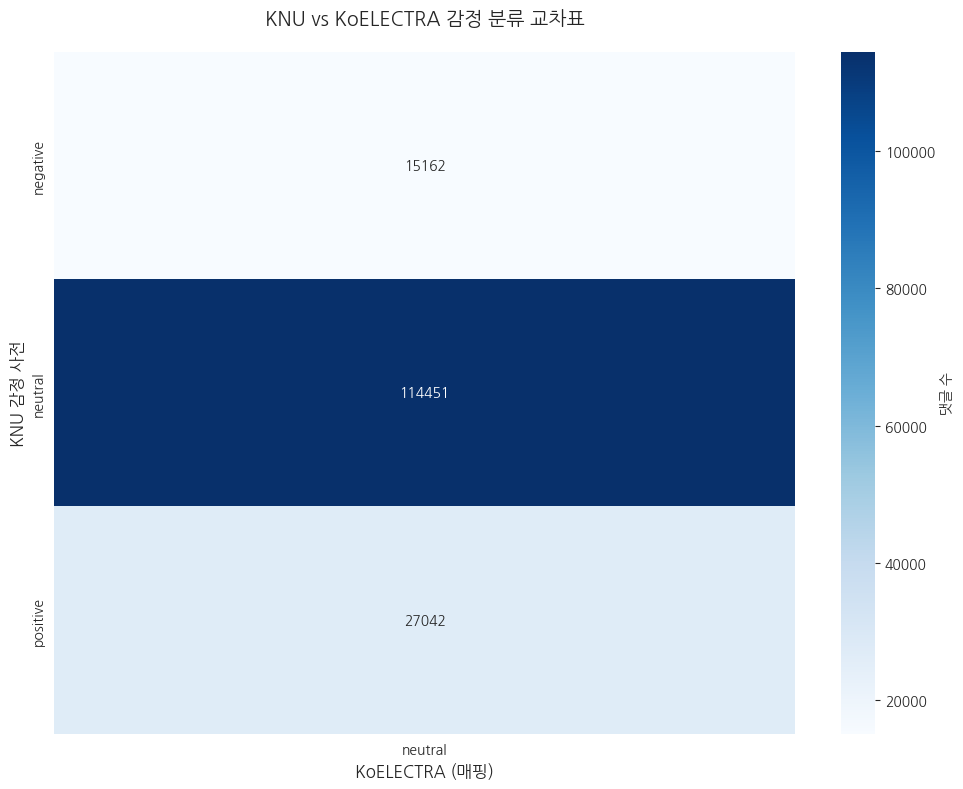

✓ 그래프 저장: output/figures/comparison_agreement_heatmap.png


In [6]:
# 일치도 히트맵
crosstab_counts = pd.crosstab(df['knu_sentiment'], df['koelectra_mapped'])

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    crosstab_counts,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar_kws={'label': '댓글 수'},
    ax=ax
)

ax.set_xlabel('KoELECTRA (매핑)', fontsize=12, weight='bold')
ax.set_ylabel('KNU 감정 사전', fontsize=12, weight='bold')
ax.set_title('KNU vs KoELECTRA 감정 분류 교차표', fontsize=14, weight='bold', pad=20)

plt.tight_layout()
plt.savefig('../output/figures/comparison_agreement_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 그래프 저장: output/figures/comparison_agreement_heatmap.png")

## 4. 혐오 표현과 감정의 관계

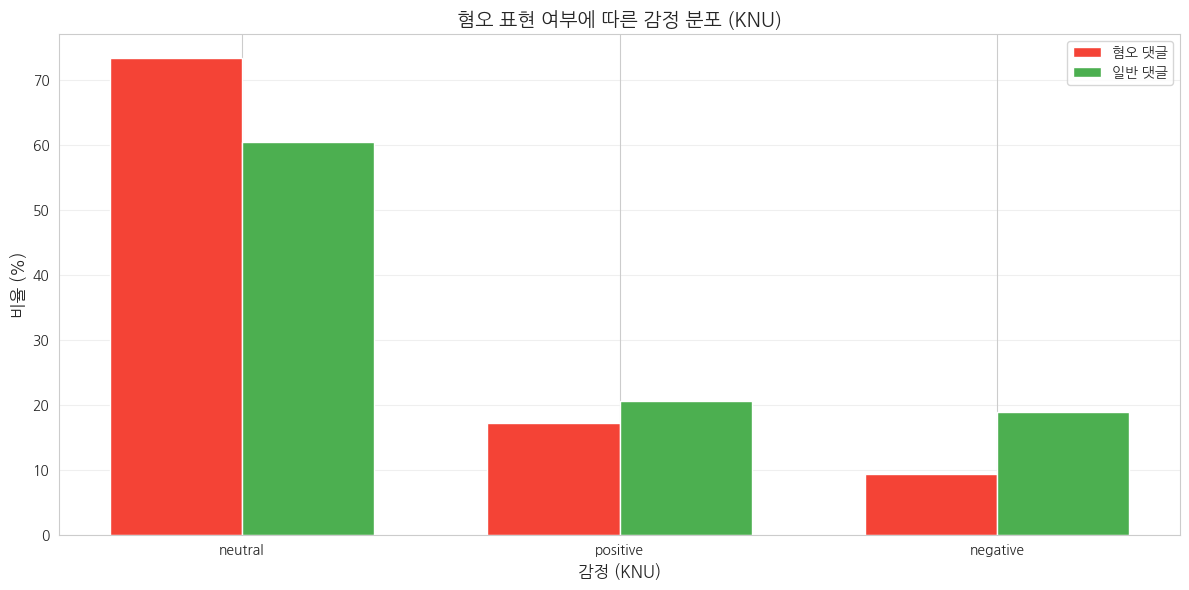

✓ 그래프 저장: output/figures/comparison_hate_vs_sentiment.png


In [7]:
# 혐오 vs 비혐오 댓글의 감정 분포 (KNU)
hate_knu = df[df['hate_is_hate'] == True]['knu_sentiment'].value_counts(normalize=True) * 100
non_hate_knu = df[df['hate_is_hate'] == False]['knu_sentiment'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(hate_knu))
width = 0.35

bars1 = ax.bar(x - width/2, hate_knu.values, width, label='혐오 댓글', color='#F44336')
bars2 = ax.bar(x + width/2, non_hate_knu.values, width, label='일반 댓글', color='#4CAF50')

ax.set_xlabel('감정 (KNU)', fontsize=12, weight='bold')
ax.set_ylabel('비율 (%)', fontsize=12, weight='bold')
ax.set_title('혐오 표현 여부에 따른 감정 분포 (KNU)', fontsize=14, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(hate_knu.index)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../output/figures/comparison_hate_vs_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 그래프 저장: output/figures/comparison_hate_vs_sentiment.png")

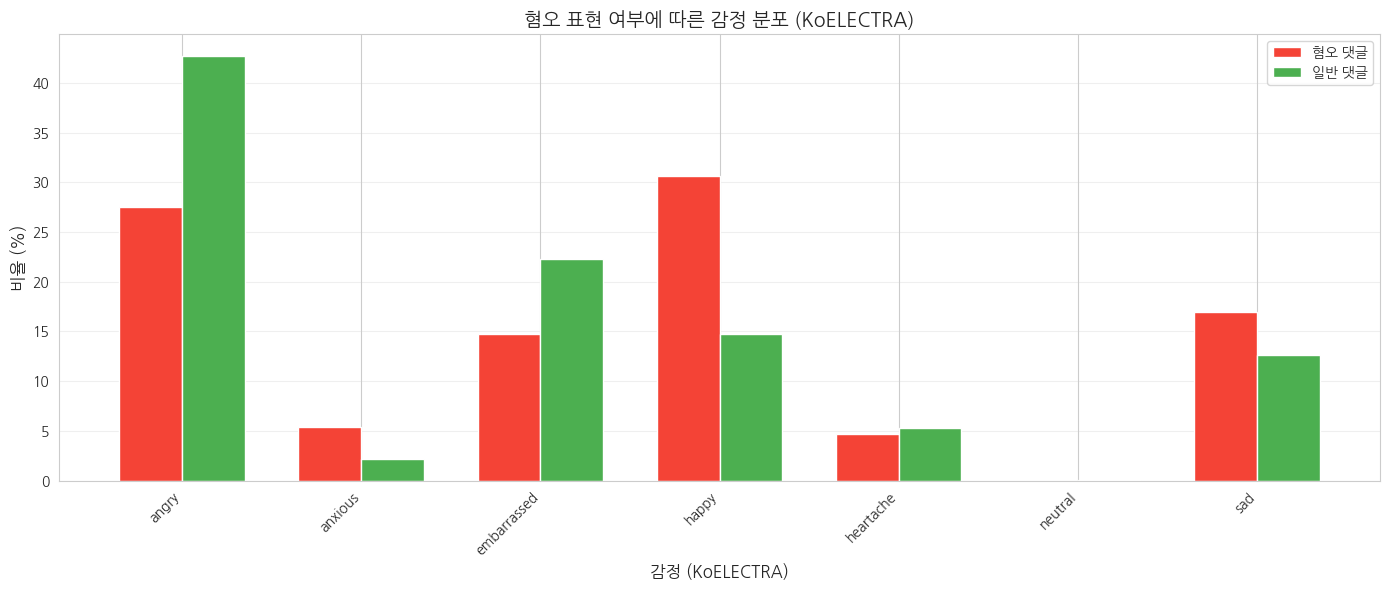

✓ 그래프 저장: output/figures/comparison_hate_vs_emotion.png


In [8]:
# 혐오 vs 비혐오 댓글의 감정 분포 (KoELECTRA)
hate_electra = df[df['hate_is_hate'] == True]['koelectra_emotion'].value_counts(normalize=True) * 100
non_hate_electra = df[df['hate_is_hate'] == False]['koelectra_emotion'].value_counts(normalize=True) * 100

# 모든 감정 레이블 통합
all_emotions = sorted(set(hate_electra.index) | set(non_hate_electra.index))

fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(all_emotions))
width = 0.35

hate_values = [hate_electra.get(e, 0) for e in all_emotions]
non_hate_values = [non_hate_electra.get(e, 0) for e in all_emotions]

bars1 = ax.bar(x - width/2, hate_values, width, label='혐오 댓글', color='#F44336')
bars2 = ax.bar(x + width/2, non_hate_values, width, label='일반 댓글', color='#4CAF50')

ax.set_xlabel('감정 (KoELECTRA)', fontsize=12, weight='bold')
ax.set_ylabel('비율 (%)', fontsize=12, weight='bold')
ax.set_title('혐오 표현 여부에 따른 감정 분포 (KoELECTRA)', fontsize=14, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(all_emotions, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../output/figures/comparison_hate_vs_emotion.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 그래프 저장: output/figures/comparison_hate_vs_emotion.png")

## 5. 프로그램별 종합 분석

In [9]:
# 프로그램별 통합 통계
program_stats = df.groupby('program').agg({
    'Video ID': 'count',  # 댓글 수
    'knu_total_score': 'mean',  # KNU 평균 점수
    'koelectra_confidence': 'mean',  # KoELECTRA 평균 신뢰도
    'hate_hate_score': 'mean',  # 평균 혐오 점수
    'hate_is_hate': lambda x: (x.sum() / len(x)) * 100  # 혐오 비율
}).rename(columns={
    'Video ID': 'total_comments',
    'knu_total_score': 'avg_knu_score',
    'koelectra_confidence': 'avg_koelectra_confidence',
    'hate_hate_score': 'avg_hate_score',
    'hate_is_hate': 'hate_ratio'
})

# 상위 20개 프로그램
top_20 = program_stats.nlargest(20, 'total_comments')

print("=" * 70)
print("📊 프로그램별 종합 통계 (상위 20개)")
print("=" * 70)
print(top_20.to_string())

📊 프로그램별 종합 통계 (상위 20개)
                                    total_comments  avg_knu_score  avg_koelectra_confidence  avg_hate_score  hate_ratio
program                                                                                                                
솔로지옥2                                  20142       0.435955                  0.622743        0.932295   97.840334
남의연애2                                  13449       0.134211                  0.472211        0.959291   99.360547
솔로지옥4                                  12124       0.022765                  0.633076        0.905326   95.999670
썸바디2                                     11451       0.192036                  0.622717        0.922209   97.004628
솔로지옥1                                  10861       0.073106                  0.622231        0.914179   96.584108
솔로지옥3                                  10389       0.039272                  0.647587        0.887634   94.956204
돌싱글즈3     

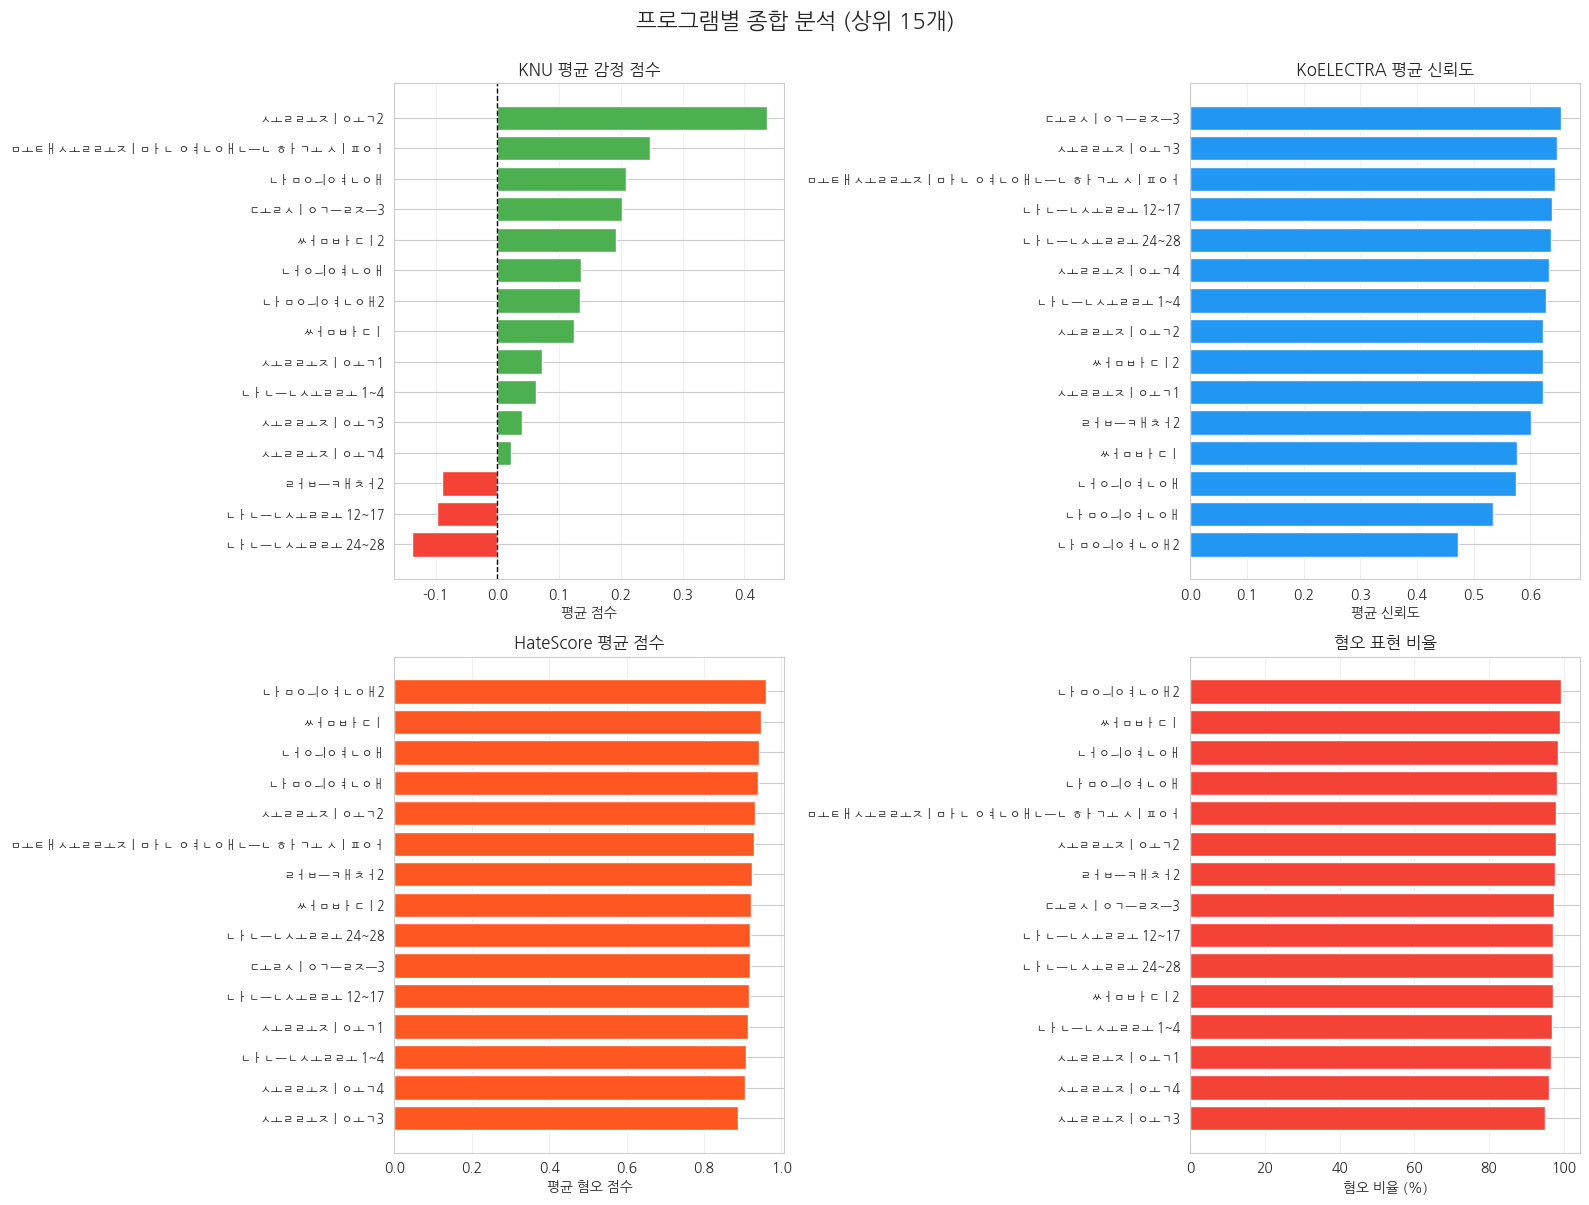

✓ 그래프 저장: output/figures/comparison_program_comprehensive.png


In [10]:
# 프로그램별 종합 점수 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

top_15 = program_stats.nlargest(15, 'total_comments')

# KNU 평균 점수
top_15_sorted = top_15.sort_values('avg_knu_score', ascending=True)
colors_knu = ['#F44336' if s < 0 else '#4CAF50' for s in top_15_sorted['avg_knu_score']]
axes[0, 0].barh(range(len(top_15_sorted)), top_15_sorted['avg_knu_score'], color=colors_knu)
axes[0, 0].set_yticks(range(len(top_15_sorted)))
axes[0, 0].set_yticklabels(top_15_sorted.index, fontsize=9)
axes[0, 0].set_xlabel('평균 점수', fontsize=10, weight='bold')
axes[0, 0].set_title('KNU 평균 감정 점수', fontsize=12, weight='bold')
axes[0, 0].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[0, 0].grid(axis='x', alpha=0.3)

# KoELECTRA 평균 신뢰도
top_15_sorted = top_15.sort_values('avg_koelectra_confidence', ascending=True)
axes[0, 1].barh(range(len(top_15_sorted)), top_15_sorted['avg_koelectra_confidence'], color='#2196F3')
axes[0, 1].set_yticks(range(len(top_15_sorted)))
axes[0, 1].set_yticklabels(top_15_sorted.index, fontsize=9)
axes[0, 1].set_xlabel('평균 신뢰도', fontsize=10, weight='bold')
axes[0, 1].set_title('KoELECTRA 평균 신뢰도', fontsize=12, weight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# 평균 혐오 점수
top_15_sorted = top_15.sort_values('avg_hate_score', ascending=True)
axes[1, 0].barh(range(len(top_15_sorted)), top_15_sorted['avg_hate_score'], color='#FF5722')
axes[1, 0].set_yticks(range(len(top_15_sorted)))
axes[1, 0].set_yticklabels(top_15_sorted.index, fontsize=9)
axes[1, 0].set_xlabel('평균 혐오 점수', fontsize=10, weight='bold')
axes[1, 0].set_title('HateScore 평균 점수', fontsize=12, weight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# 혐오 비율
top_15_sorted = top_15.sort_values('hate_ratio', ascending=True)
colors_hate = ['#F44336' if r > 10 else '#FF9800' if r > 5 else '#4CAF50' for r in top_15_sorted['hate_ratio']]
axes[1, 1].barh(range(len(top_15_sorted)), top_15_sorted['hate_ratio'], color=colors_hate)
axes[1, 1].set_yticks(range(len(top_15_sorted)))
axes[1, 1].set_yticklabels(top_15_sorted.index, fontsize=9)
axes[1, 1].set_xlabel('혐오 비율 (%)', fontsize=10, weight='bold')
axes[1, 1].set_title('혐오 표현 비율', fontsize=12, weight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.suptitle('프로그램별 종합 분석 (상위 15개)', fontsize=16, weight='bold', y=1.00)
plt.tight_layout()
plt.savefig('../output/figures/comparison_program_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 그래프 저장: output/figures/comparison_program_comprehensive.png")

## 6. 상관관계 분석

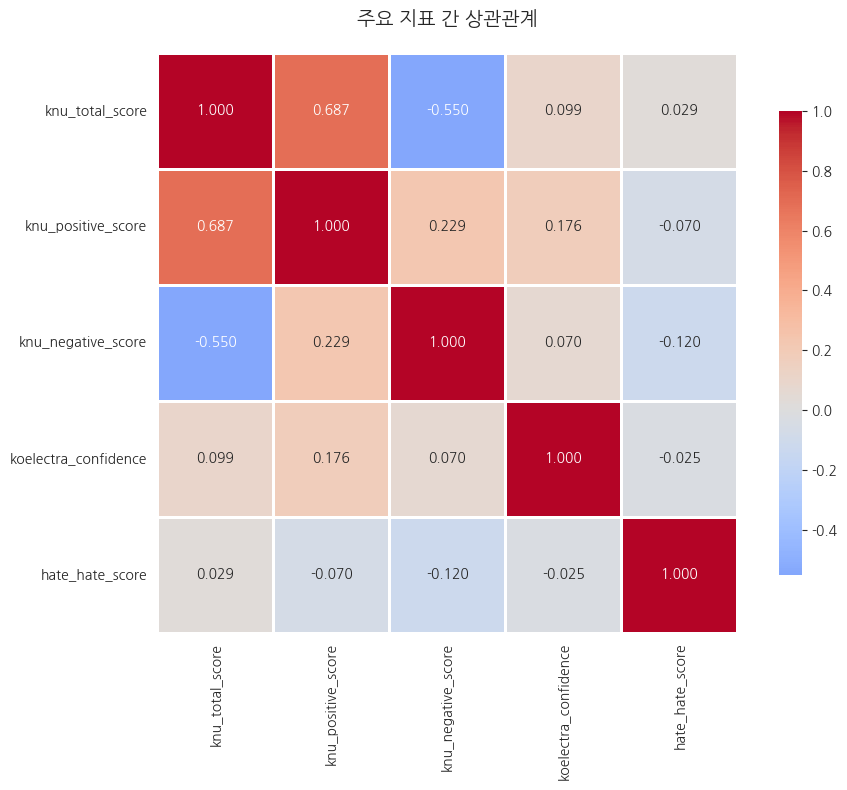

✓ 그래프 저장: output/figures/comparison_correlation_matrix.png


In [11]:
# 주요 지표 간 상관관계
correlation_cols = [
    'knu_total_score',
    'knu_positive_score',
    'knu_negative_score',
    'koelectra_confidence',
    'hate_hate_score'
]

# 샘플링 (메모리 절약)
sample_size = min(10000, len(df))
df_sample = df[correlation_cols].sample(n=sample_size, random_state=42)

correlation = df_sample.corr()

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    correlation,
    annot=True,
    fmt='.3f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={'shrink': 0.8},
    ax=ax
)

ax.set_title('주요 지표 간 상관관계', fontsize=14, weight='bold', pad=20)

plt.tight_layout()
plt.savefig('../output/figures/comparison_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ 그래프 저장: output/figures/comparison_correlation_matrix.png")

## 7. 주요 인사이트 및 결론

In [12]:
print("=" * 70)
print("💡 주요 인사이트")
print("=" * 70)
print()

# 1. 방법론 간 일치도
print("1. 방법론 간 일치도")
print(f"   - KNU vs KoELECTRA 일치율: {agreement:.1f}%")
print()

# 2. 혐오 표현과 감정의 관계
hate_negative_ratio = (df[df['hate_is_hate'] == True]['knu_sentiment'] == 'negative').sum() / df['hate_is_hate'].sum() * 100
print("2. 혐오 표현과 감정의 관계")
print(f"   - 혐오 댓글 중 부정 감정 비율: {hate_negative_ratio:.1f}%")
print()

# 3. 프로그램별 특성
print("3. 프로그램별 특성")
most_positive_prog = program_stats['avg_knu_score'].idxmax()
most_negative_prog = program_stats['avg_knu_score'].idxmin()
most_hate_prog = program_stats['hate_ratio'].idxmax()
print(f"   - 가장 긍정적인 프로그램: {most_positive_prog}")
print(f"   - 가장 부정적인 프로그램: {most_negative_prog}")
print(f"   - 혐오 표현이 가장 많은 프로그램: {most_hate_prog}")
print()

# 4. 상관관계 인사이트
knu_hate_corr = correlation.loc['knu_total_score', 'hate_hate_score']
print("4. 상관관계 인사이트")
print(f"   - KNU 감정 점수 vs 혐오 점수 상관계수: {knu_hate_corr:.3f}")
if knu_hate_corr < -0.3:
    print("   → 부정적 감정과 혐오 표현 간 중간 이상의 음의 상관관계")
elif knu_hate_corr < -0.1:
    print("   → 부정적 감정과 혐오 표현 간 약한 음의 상관관계")
else:
    print("   → 감정과 혐오 표현 간 상관관계 미약")

💡 주요 인사이트

1. 방법론 간 일치도
   - KNU vs KoELECTRA 일치율: 73.1%

2. 혐오 표현과 감정의 관계
   - 혐오 댓글 중 부정 감정 비율: 9.4%

3. 프로그램별 특성
   - 가장 긍정적인 프로그램: 솔로지옥2
   - 가장 부정적인 프로그램: 소년 소녀 연애하다
   - 혐오 표현이 가장 많은 프로그램: 소년 소녀 연애하다

4. 상관관계 인사이트
   - KNU 감정 점수 vs 혐오 점수 상관계수: 0.029
   → 감정과 혐오 표현 간 상관관계 미약


## 8. 최종 결론

### 세 가지 분석 방법론 비교 요약

#### 1. KNU 감정 사전 (렉시콘 기반)
**장점**:
- 빠른 처리 속도
- 해석이 명확함
- 감정 점수 정량화 용이

**단점**:
- 문맥 파악 제한적
- 신조어/은어 처리 어려움
- 3가지 감정만 분류

#### 2. KoELECTRA 감정 분류 (딥러닝)
**장점**:
- 7가지 세분화된 감정 분류
- 문맥 고려한 정확한 분석
- 높은 신뢰도

**단점**:
- 처리 시간 소요
- 모델 의존성
- 해석의 복잡성

#### 3. HateScore 혐오 표현 분석 (딥러닝)
**장점**:
- 혐오 표현 특화 탐지
- 10가지 카테고리 세분화
- 커뮤니티 관리에 유용

**단점**:
- 처리 시간 소요
- 문화적 맥락 고려 필요
- 오탐 가능성

### 종합 권장사항

1. **빠른 트렌드 파악**: KNU 감정 사전 활용
2. **정교한 감정 분석**: KoELECTRA 활용
3. **커뮤니티 안전 관리**: HateScore 활용
4. **종합 분석**: 세 가지 방법론 결합 사용

### 향후 연구 방향

- 방법론 간 앙상블 모델 개발
- 시계열 분석을 통한 트렌드 변화 추적
- 특정 프로그램/동영상에 대한 심층 분석
- 댓글 작성자 행동 패턴 분석